In [1]:
library(RSQLite)
library(DBI)

con <- dbConnect(RSQLite::SQLite(), "eventdb")


In [2]:
res <- dbSendQuery(con, "SELECT * FROM EventDetected where eventName='event'")
events<-dbFetch(res)
events$date<-as.POSIXct(events$date/1000,origin="1970-01-01")
events$day<-trunc(events$date,units = "day")


In [4]:
numDay<-aggregate(x=events["day"], by=list(as.character(events$day)),FUN=length)
names(numDay)<-c("day","count")
numDay$day<-as.POSIXct(numDay$day)
head(numDay)

str(numDay)

day,count
2018-03-31,30
2018-04-01,60
2018-04-02,47
2018-04-03,64
2018-04-04,50
2018-04-05,53


'data.frame':	87 obs. of  2 variables:
 $ day  : POSIXct, format: "2018-03-31" "2018-04-01" ...
 $ count: int  30 60 47 64 50 53 49 56 46 39 ...


In [5]:
library(zoo)
s<-zoo(x = numDay$count,order.by = numDay$day)
sm<-rollmean(x = s,k = 5,align = 'center',fill = NA)
numDay$mean5<-coredata(sm)


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Warning message:
“Removed 4 rows containing missing values (geom_path).”

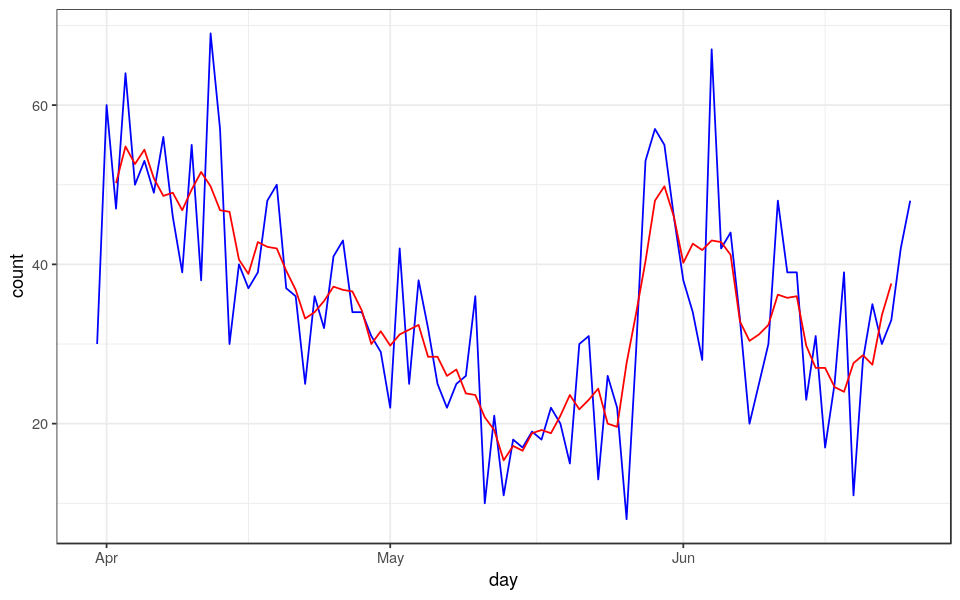

In [11]:
options(repr.plot.height=5,repr.plot.width=8)
library(ggplot2)
ggplot(data=numDay,aes(x=day,y=count))+geom_line(col="blue")+geom_line(aes(y=mean5),col="red")+theme_bw()


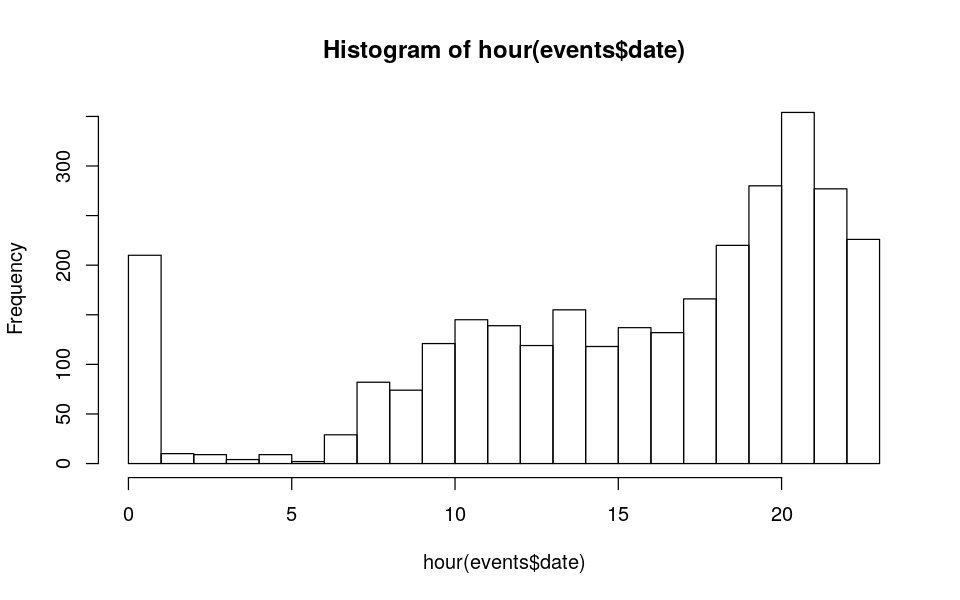

In [12]:
library(lubridate)
hist(hour(events$date),24)

In [81]:
table(weekdays(events$date))
sort(prop.table(table(weekdays(events$date))))

chisq.test(table(weekdays(events$date)))


   Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
      388       513       376       407       457       434       443 


 Saturday    Friday    Sunday   Tuesday Wednesday  Thursday    Monday 
0.1245858 0.1285620 0.1348575 0.1438038 0.1467860 0.1514248 0.1699801 


	Chi-squared test for given probabilities

data:  table(weekdays(events$date))
X-squared = 30.159, df = 6, p-value = 3.666e-05
